In [1]:
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

perceptron_learning

In [2]:
def perceptron_learning(X, y, lr, epochs):
    #Intialize weights
    n = X.shape[1]
    # add extra row as the entry for bias term in W
    X_bias = np.concatenate((X, np.ones((1, n))), axis = 0)

    # initialize weights matrix with shape of (1, 3)
    weights = np.random.rand(X.shape[0] + 1)
    acc = []
    
    for epoch in range(epochs):
        for i in range(n):
            predection = np.dot(weights, X_bias[:,i])
            pred = np.sign(predection)
            error= y[i] - pred
            weights += 0.5 * lr * error * X_bias[:, i].T
        acc.append(compute_accuracy(X, y, weights)) 

    
    return weights, acc

## delta_learning

In [3]:
def delta_learning_seq(X, y, lr = 0.001, epochs = 20):
    '''
    delta rule training sample on sequential mode
    n is the size of input data points
    shape of X (input patterns) = (2, n)
    shape of y (labels) = (1, n)
    '''

    n = X.shape[1]
    # add extra row as the entry for bias term in W
    X_bias = np.concatenate((X, np.ones((1, n))), axis = 0)

    # initialize weights matrix with shape of (1, 3)
    weights = np.random.rand(X.shape[0] + 1)
    loss_per_dp = []
    loss_per_epoch = []
    acc_per_dp = []
    acc_per_epoch = []

    for epoch in range(epochs):
        for i in range(n):
            pred = np.dot(weights, X_bias[:, i])
            error = y[i] - pred
            # Δw = lr*error*X[:,i].T, error is a scalar here
            weights += lr * error * X_bias[:, i].T
            # add loss to errors per data point
            error_total = y - np.dot(weights, X_bias)
            loss = 0.5 * np.mean(error_total**2)
            loss_per_dp.append(loss)
            acc_per_dp.append(compute_accuracy(X, y, weights))
            
        loss_per_epoch.append(loss)
        acc_per_epoch.append(compute_accuracy(X, y, weights))

    return weights, loss_per_dp, loss_per_epoch, acc_per_dp, acc_per_epoch

def delta_learning_batch(X, y, lr = 0.001, epochs = 20):
    '''
    delta rule training on batch mode
    n is the size of input data points
    shape of X (input patterns) = (2, n)
    shape of y (labels) = (1, n)
    '''
    n = X.shape[1]
    # add extra row as the entry for bias term in W
    X_bias = np.concatenate((X, np.ones((1, n))), axis = 0)

    # initialize weights matrix with shape of (1, 3)
    weights = np.random.rand(X.shape[0] + 1)
    loss_per_epoch = []
    acc_per_epoch = []
    for epoch in range(epochs):
        pred = np.dot(weights, X_bias)
        error = y - pred
        
        weights += lr * np.dot(error, X_bias.T)

        # add loss per epoch
        loss_per_epoch.append(0.5 * np.mean(error**2))

        acc_per_epoch.append(compute_accuracy(X, y, weights))
    return weights, loss_per_epoch, acc_per_epoch

## delta learning no bias

In [4]:
def delta_learning_seq_no_bias(X, y, lr = 0.001, epochs = 20):
    '''
    delta rule training sample on sequential mode
    n is the size of input data points
    shape of X (input patterns) = (2, n)
    shape of y (labels) = (1, n)
    '''

    n = X.shape[1]
    # add extra row as the entry for bias term in W
    X_bias = X

    # initialize weights matrix with shape of (1, 3)
    weights = np.random.rand(X.shape[0])
    loss_per_dp = []
    loss_per_epoch = []
    acc_per_dp = []
    acc_per_epoch = []

    for epoch in range(epochs):
        for i in range(n):
            pred = np.dot(weights, X_bias[:, i])
            error = y[i] - pred
            # Δw = lr*error*X[:,i].T, error is a scalar here
            weights += lr * error * X_bias[:, i].T
            # add loss to errors per data point
            error_total = y - np.dot(weights, X_bias)
            loss = 0.5 * np.mean(error_total**2)
            loss_per_dp.append(loss)
            acc_per_dp.append(compute_accuracy(X, y, weights))
            
        loss_per_epoch.append(loss)
        acc_per_epoch.append(compute_accuracy(X, y, weights))

    return weights, loss_per_dp, loss_per_epoch, acc_per_dp, acc_per_epoch

def delta_learning_batch_no_bias(X, y, lr = 0.001, epochs = 20):
    '''
    delta rule training on batch mode
    n is the size of input data points
    shape of X (input patterns) = (2, n)
    shape of y (labels) = (1, n)
    '''
    n = X.shape[1]
    # add extra row as the entry for bias term in W
    X_bias = X

    # initialize weights matrix with shape of (1, 3)
    weights = np.random.rand(X.shape[0])
    loss_per_epoch = []
    acc_per_epoch = []
    for epoch in range(epochs):
        pred = np.dot(weights, X_bias)
        error = y - pred
        
        weights += lr * np.dot(error, X_bias.T)

        # add loss per epoch
        loss_per_epoch.append(0.5 * np.mean(error**2))

        acc_per_epoch.append(compute_accuracy(X, y, weights))
    return weights, loss_per_epoch, acc_per_epoch

## compute_accuracy

In [5]:
def compute_accuracy(X, y, w):
    '''
    compute accuracy of classification in the whole data set
    '''
    n = X.shape[1]
    # add extra row as the entry for bias term in W
    if w.shape[0] == 2:
        X_bias = X 
    else:
        X_bias = np.concatenate((X, np.ones((1, n))), axis = 0)
    
    pred = np.dot(w, X_bias)
    y_pred = np.where(pred > 0, 1, -1)
    cnt = 0
    for yi, yi_p in zip(y, y_pred):
        cnt += 0.5 * np.abs(yi - yi_p)
    
    return 1 - cnt / n

## generate data

In [4]:
np.random.seed(10)
n = 1000
#Can change mA, mB, sigmA and sigmaB 
mA = [1, 0.5]
mB = [-1, 0]
# mA = [0, 0]
# mB = [-2.5, 0]
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros((2, n))
classA[0, :] = np.random.randn(1, n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(1, n) * sigmaA + mA[1]

classB = np.zeros((2, n))
classB[0, :] = np.random.randn(1, n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(1, n) * sigmaB + mB[1]

labels = np.concatenate((-np.ones(n), np.ones(n)))
data = np.concatenate((classA, classB), axis=1)
print(data.shape)
shuffle_index = np.random.permutation(2 * n)
data = data[:, shuffle_index]
labels = labels[shuffle_index]

(2, 2000)


## plot line

In [13]:
def plot_line(p, w, start, end, l = 'delta sequential', c = 'black',):
    '''
    w: the weights of the line on 2D plane
    '''
    x = np.linspace(start, end, 10)
    y = np.linspace(start, end, 10)
    if w.shape[0] == 3:
        if w[0] == 0:
            y = np.full(100, -w[2]/w[1])
        elif w[1] == 0:
            x = np.full(100, -w[2]/w[0])
        else:
            y = -(w[2]+w[0]*x)/w[1]
    else:
        y = -w[0]*x/w[1]
    
    p.plot(x, y, label = l, color = c)

## training

In [107]:
lr = 0.001
epochs = 20
# print(data.shape, labels.shape)
#w_per, errors_per = perceptron_learning(data, labels, lr, epochs)
w_batch, loss_batch, acc_batch = delta_learning_batch(data, labels, lr, epochs)
w_batch_nb, loss_batch_nb, acc_batch_nb = delta_learning_batch_no_bias(data, labels, lr, epochs)

w_p, acc_p = perceptron_learning(data, labels, lr, epochs)
# print(w_seq, w_batch)

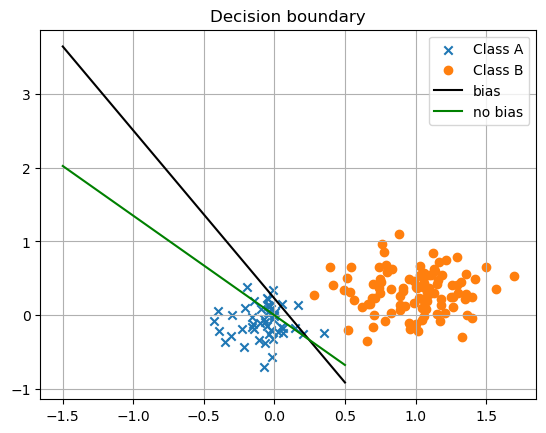

In [108]:
plt.scatter(data[0, labels == -1], data[1, labels == -1], label='Class A', marker='x')
plt.scatter(data[0, labels == 1], data[1, labels == 1], label='Class B', marker='o')

plot_line(plt, w_batch, -1.5, 0.5, 'bias', 'black')
# plot_line(w_batch,-1.5, 0.5, 'delta batch', 'red')
plot_line(plt, w_batch_nb, -1.5, 0.5, 'no bias', 'green')
plt.title('Decision boundary')
plt.grid(True)
plt.legend()
plt.show()

plot loss of delta seq and delta batch

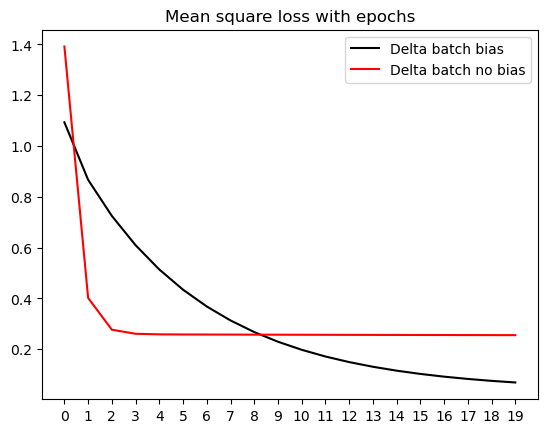

In [12]:
x = np.arange(0, epochs, 1)
plt.plot(x, loss_batch, label='Delta batch bias', color = 'black')
plt.plot(x, loss_batch_nb, label='Delta batch no bias', color = 'red')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.title('Mean square loss with epochs')
plt.show()


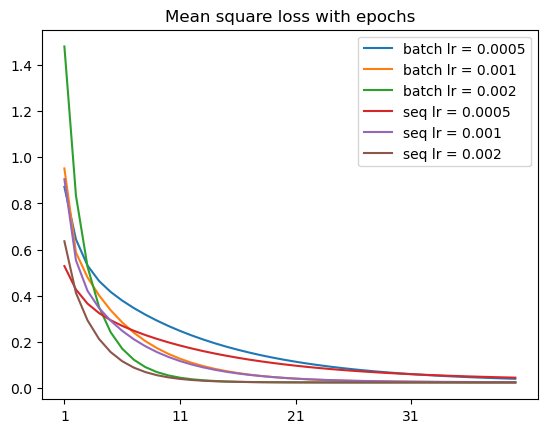

In [26]:
epochs = 40
x = np.arange(1, epochs + 1, 1)
_, loss_batch1, _ = delta_learning_batch(data, labels, 0.0005, epochs)
_, loss_batch2, _ = delta_learning_batch(data, labels, 0.001, epochs)
_, loss_batch3, _ = delta_learning_batch(data, labels, 0.002, epochs)
# _, loss_batch4, _ = delta_learning_batch(data, labels, 0.008, epochs)

_,_, loss_batch4, _,_ = delta_learning_seq(data, labels, 0.0005, epochs)
_,_, loss_batch5, _,_ = delta_learning_seq(data, labels, 0.001, epochs)
_,_, loss_batch6, _,_ = delta_learning_seq(data, labels, 0.002, epochs)

plt.plot(x, loss_batch1, label='batch lr = 0.0005', )
plt.plot(x, loss_batch2, label='batch lr = 0.001', )
plt.plot(x, loss_batch3, label='batch lr = 0.002',)
plt.plot(x, loss_batch4, label='seq lr = 0.0005', )
plt.plot(x, loss_batch5, label='seq lr = 0.001', )
plt.plot(x, loss_batch6, label='seq lr = 0.002',)

# plt.plot(x, loss_batch4, label='lr = 0.008',)
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 10))
plt.title('Mean square loss with epochs')
plt.show()

sensitivity to random initialization

In [30]:
lr = 0.001
epochs = 20
N = 100
loss_seq_list = []
acc_seq_list = []
loss_batch_list = []
acc_batch_list = []

for i in range(N):
    _,_, loss_seq, _,acc_seq = delta_learning_seq(data, labels, lr, epochs)
    loss_seq_list.append(loss_seq[-1])
    acc_seq_list.append(acc_seq[-1])

for i in range(N):
    _, loss_batch, acc_batch = delta_learning_batch(data, labels, lr, epochs)
    loss_batch_list.append(loss_batch[-1])
    acc_batch_list.append(acc_batch[-1])



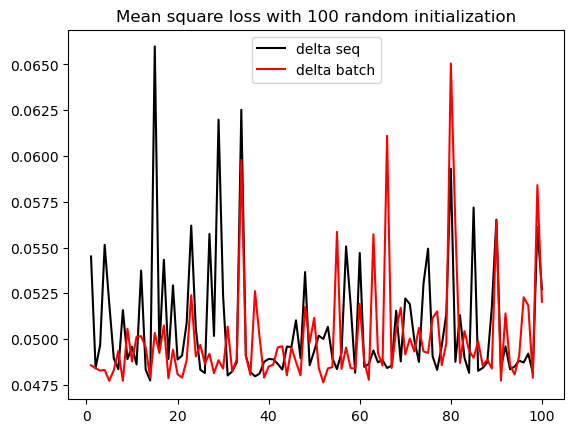

In [35]:
x = np.arange(1, N + 1, 1)
plt.plot(x, loss_seq_list, label='delta seq', color = 'black')
plt.plot(x, loss_batch_list, label='delta batch', color = 'red')
plt.legend()
plt.title('Mean square loss with 100 random initialization')
plt.show()

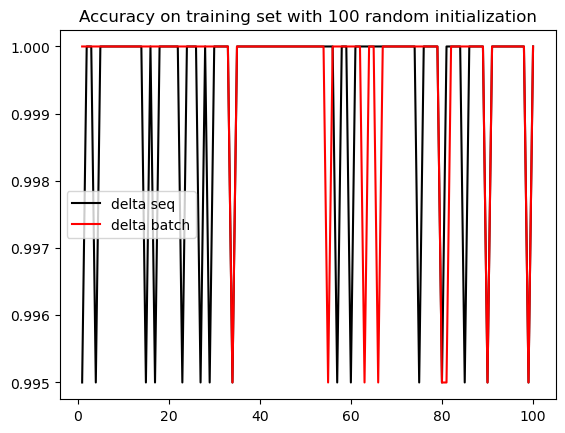

In [34]:
plt.plot(x, acc_seq_list, label='delta seq', color = 'black')
plt.plot(x, acc_batch_list, label='delta batch', color = 'red')
plt.legend()
plt.title('Accuracy on training set with 100 random initialization')
plt.show()

## Classification of samples that are not linearly separable

generate not linearly separable dataset

In [6]:
def subsample(classA, classB, na, nb):
    nA = classA.shape[1]
    nB = classB.shape[1]
    sub_indexA = np.random.choice(nA, na, False)
    sub_indexB = np.random.choice(nB, nb, False)
    sub_classA = classA[:,sub_indexA]
    sub_classB = classB[:,sub_indexB]

    data = np.concatenate((sub_classA, sub_classB), axis=1)
    labels = np.concatenate((-np.ones(na), np.ones(nb)))
    shuffle_index = np.random.permutation(na + nb)
    data = data[:, shuffle_index]
    labels = labels[shuffle_index]
    return data, labels



In [8]:
n = 100
mA = [0, -0.1]
mB = [1, 0.3]
sigmaA = 0.2
sigmaB = 0.3
np.random.seed(10)
classA = np.zeros((2, n))
classA[0, :] = np.random.randn(1, n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(1, n) * sigmaA + mA[1]

classB = np.zeros((2, n))
classB[0, :] = np.random.randn(1, n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(1, n) * sigmaB + mB[1]

data_tmp = np.concatenate((classA, classB), axis=1)
labels_tmp = np.concatenate((-np.ones(classA.shape[1]), np.ones(classB.shape[1])))
shuffle_index = np.random.permutation(labels_tmp.size)
data_origin = data_tmp[:, shuffle_index]
label_origin = labels_tmp[shuffle_index]
print(np.where(classA[0,:]<0))

(array([ 2,  3,  5,  9, 12, 16, 19, 20, 21, 28, 30, 31, 33, 37, 39, 41, 42,
       43, 44, 45, 46, 49, 50, 52, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69,
       72, 76, 78, 79, 82, 83, 84, 85, 86, 89, 92, 93, 96, 99],
      dtype=int64),)


remove random data points

In [9]:
# remove random 25% from each class
data1, label1 = subsample(classA, classB, 75, 75)
# remove random 50% from classA
data2, label2 = subsample(classA, classB, 50, 100)
# remove random 50% from classB
data3, label3 = subsample(classA, classB, 100, 50)

# 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

index_negative = np.where(classA[0, :] < 0)
index_positive = np.where(classA[0, :] > 0)
sub_index_n = np.random.choice(index_negative[0], int(0.8*index_negative[0].size), False)
# print(sub_index_n)
sub_index_p = np.random.choice(index_positive[0], int(0.2*index_positive[0].size), False)

classA_sub = classA[:, np.concatenate((sub_index_n, sub_index_p))]
data = np.concatenate((classA_sub, classB), axis=1)
labels = np.concatenate((-np.ones(classA_sub.shape[1]), np.ones(classB.shape[1])))
shuffle_index = np.random.permutation(labels.size)
data4 = data[:, shuffle_index]
label4 = labels[shuffle_index]
dataset_all = [(data1, label1), (data2, label2), (data3, label3), (data4, label4)]


training

In [10]:
def compute_accuracy_for_each_class(X, y, w):
    '''
    compute accuracy of classification in the whole data set
    '''
    n = X.shape[1]
    # add extra row as the entry for bias term in W
    if w.shape[0] == 2:
        X_bias = X 
    else:
        X_bias = np.concatenate((X, np.ones((1, n))), axis = 0)
    
    pred = np.dot(w, X_bias)
    y_pred = np.where(pred > 0, 1, -1)
    cnt_A = 0
    n_A = 0
    cnt_B = 0
    for yi, yi_p in zip(y, y_pred):
        if yi == -1:
            cnt_A += 0.5 * np.abs(yi - yi_p)
            n_A += 1
        else:
            cnt_B += 0.5 * np.abs(yi - yi_p)
    acc_A = np.round(1 - cnt_A/n_A, 2)
    acc_B = np.round(1 - cnt_B/(n - n_A),2)
    return (acc_A, acc_B)

In [17]:
lr = 0.001
epochs = 20

weight_p = []
weight_d_seq = []
weight_d_batch = []
acc_p = []
acc_d_seq = []
acc_d_batch = []

for dataset in dataset_all:
    w_p, _ = perceptron_learning(dataset[0], dataset[1], lr, epochs)
    w_d_seq, _, _, _, _ = delta_learning_seq(dataset[0], dataset[1], lr, epochs)
    w_d_batch, _, _ = delta_learning_batch(dataset[0], dataset[1], lr, epochs)
    weight_p.append(w_p)
    weight_d_seq.append(w_d_seq)
    weight_d_batch.append(w_d_batch)
    acc_p.append(compute_accuracy_for_each_class(data_origin, label_origin, w_p))
    acc_d_seq.append(compute_accuracy_for_each_class(data_origin, label_origin, w_d_seq))
    acc_d_batch.append(compute_accuracy_for_each_class(data_origin, label_origin, w_d_batch))



plot and compute the accuracy

Accuracy of perceptron learning for each dataset:
[(0.74, 0.98), (0.85, 1.0), (0.9, 0.95), (0.78, 0.98)]
Accuracy of delta learning sequential for each dataset:
[(0.98, 0.98), (0.94, 0.98), (0.99, 0.93), (0.85, 1.0)]
Accuracy of delta learning batch for each dataset:
[(0.98, 0.97), (0.62, 1.0), (0.99, 0.93), (0.92, 0.99)]



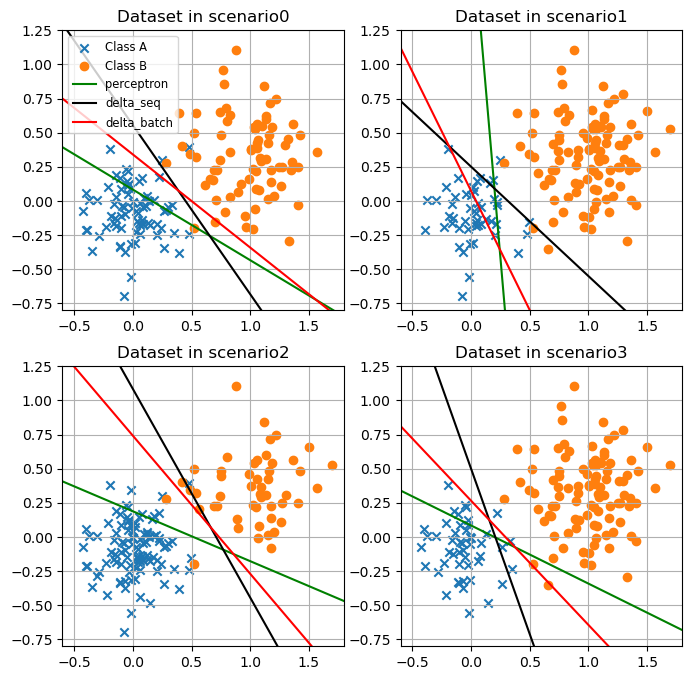

In [19]:

print('Accuracy of perceptron learning for each dataset:')
print(acc_p)
print('Accuracy of delta learning sequential for each dataset:')
print(acc_d_seq)
print('Accuracy of delta learning batch for each dataset:')
print(acc_d_batch)
print('')

# plot decision boundaries for each dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax1 = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
for i, ax in enumerate(ax1):
    dataseti = dataset_all[i][0]
    labeli = dataset_all[i][1]
    ax.set_xlim(-0.6, 1.8)
    ax.set_ylim(-0.8, 1.25)
    ax.scatter(dataseti[0, labeli == -1], dataseti[1, labeli == -1], label='Class A', marker='x')
    ax.scatter(dataseti[0, labeli == 1], dataseti[1, labeli == 1], label='Class B', marker='o')

    plot_line(ax, weight_p[i], -5, 5, 'perceptron', 'green')
    plot_line(ax, weight_d_seq[i], -5, 5, 'delta_seq', 'black')
    plot_line(ax, weight_d_batch[i], -5, 5, 'delta_batch', 'red')
    ax.grid(True)
    ax.set_title('Dataset in scenario{}'.format(i))
    if i == 0:
        ax.legend(fontsize='small')

# fig.suptitle('Decision boundaries')
# plt.tight_layout()
plt.show()